# Imports

In [1]:
import pandas as pd
import os
from datetime import datetime
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]

# Read the data

Let's take a toy dataset, with some supermarket foods:

In [2]:
local_path = os.path.join('data','food.csv')
url = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/Data%20Wrangling/Timeseries%20%26%20DoubleIndex/Double%20Index/data/food.csv"
food = pd.read_csv(url)
food.head()

,Store,Product,Price,Quality
0,Incontinente,Apples,3.0,2.0
1,Incontinente,Bananas,2.0,4.0
2,Incontinente,Rice,1.0,3.0
3,Incontinente,Olives,4.0,2.0
4,Dingo Poce,Apples,2.0,2.0


In [3]:
food = food.set_index(['Store', 'Product'])
food = food.sort_index() # ALWAYS sort the index

food

Price  Quality
Store        Product                 
Dingo Poce   Apples      2.0      2.0
             Bananas     3.0      3.0
             Dog food    7.0      1.0
             Rice        1.0      4.0
Dumbo        Apples      2.0      3.0
             Dog food    1.0      2.0
             Rice        5.0      4.0
Incontinente Apples      3.0      2.0
             Bananas     2.0      4.0
             Olives      4.0      2.0
             Rice        1.0      3.0

Multi-indexes are crazy useful, especially when the datasets get bigger. They allow us to go into higher dimensions than two dimensions, and keep the intuitive "tabular" structure.



Let's learn how to select from this!

## Selecting in multi-indexes

### loc

Remember loc? Loc is awesome :)

Remember, loc allows you to select by doing `data.loc[index, columns]`

Now that we have multiple index levels, we will have to use them a bit more explicitly.

In [4]:
food

Price  Quality
Store        Product                 
Dingo Poce   Apples      2.0      2.0
             Bananas     3.0      3.0
             Dog food    7.0      1.0
             Rice        1.0      4.0
Dumbo        Apples      2.0      3.0
             Dog food    1.0      2.0
             Rice        5.0      4.0
Incontinente Apples      3.0      2.0
             Bananas     2.0      4.0
             Olives      4.0      2.0
             Rice        1.0      3.0

In [5]:
idx = pd.IndexSlice  # <---- convention, get ready to copy paste this a lot

In [6]:
food.loc[idx[: , 'Apples'], 'Price']

,,Price
Store,Product,
Dingo Poce,Apples,2.0
Dumbo,Apples,2.0
Incontinente,Apples,3.0


Great! Now that I've [fully converted you](https://i.imgflip.com/29imng.jpg) to Pandas convention, I will use [advanced indexing with idx](https://pandas.pydata.org/pandas-docs/stable/advanced.html#using-slicers) through the rest of the BLUs.

Let's answer another question: _What are all the prices at Dingo Poce?_

In [7]:
# from food,
# A) get the slice of the index
# B) where the index_level_0 is 'Dingo Poce',
# C) and everything on the second level (:)
# D) also, give me all the columns (:)

food.loc[idx['Dingo Poce', :], :]

Price  Quality
Store      Product                 
Dingo Poce Apples      2.0      2.0
           Bananas     3.0      3.0
           Dog food    7.0      1.0
           Rice        1.0      4.0

Now you may be asking yourself the following:

> _"sure, but I've been calling loc with just one argument, because I'm cool. Maybe I can do that here?"_

In [8]:
# Oy! Pandas! Get me Dingo Poce, and you figure out what I mean!
food.loc['Dingo Poce']

,Price,Quality
Product,,
Apples,2.0,2.0
Bananas,3.0,3.0
Dog food,7.0,1.0
Rice,1.0,4.0


This will work, as long as you are selecting from the first level of the index.  
Pandas kind of has to say _"hmmm... I'm going to go ahead and assume you **meant** `food.loc['Dingo Poce', :, :]`"_

The problem with not being explicit is that now that we're in multi-index land, things can go wrong. What if I wanted to select from the second level (let's say we want "all the apples")?

In [9]:
# this is going to blow up, so let's catch the error
try:
    # Oy! Pandas! Get me Apples, and you figure out what I mean!
    food.loc['Apples']
# catch the error
except KeyError as key_err:
    # print it
    print('We got this error: %s' % key_err)

We got this error: 'Apples'


Kind of makes sense, right?  
It doesn't know in which level of the axis we mean, and because we didn't say anything, it just looked for a Store called _Apples_ (the _"Apples store"_ ), and didn't find any.

So let's establish a rule here:
> **"Always be explicit, even when implicit has a good chance of working.**"

The reason is that when things fail, and you get used to using the "slightly incorrect way" and expecting Pandas to forgive you, you will suffer. Big time.

So, let's be explicit:

In [10]:
# from food,
# A) get the slice of the index
# B) where we want everything from the first level of the index
# C) and only the apples from the second level of the index
# D) again, all of the columns

# food.loc[A[B, C], D]
food.loc[idx[:, 'Apples'], :]

# idx is love. idx is life.

,,Price,Quality
Store,Product,,
Dingo Poce,Apples,2.0,2.0
Dumbo,Apples,2.0,3.0
Incontinente,Apples,3.0,2.0


That works! Let's do a few more, for practice:

##### _"The apples at Dingo Poce"_

In [11]:
food.loc[idx['Dingo Poce', 'Apples'], :]

,Dingo Poce
,Apples
Price,2.0
Quality,2.0


##### _"The price of Bananas, at any store"_

In [12]:
food.loc[idx[:, 'Bananas'], 'Price']

,,Price
Store,Product,
Dingo Poce,Bananas,3.0
Incontinente,Bananas,2.0


##### _"The quality of Olives, at any Incontinente"_

In [13]:
food.loc[idx['Incontinente', 'Olives'], 'Quality']

2.0

##### _"The quality of Rice and Bananas, at any Incontinente"_

In [14]:
# notice that we can pass a list to the second half of the index slice
food.loc[idx['Incontinente', ['Bananas', 'Rice']], 'Quality']

Store         Product
Incontinente  Bananas    4.0
              Rice       3.0
Name: Quality, dtype: float64

----

### Slicing in multi-indexes

Sometimes instead of listing the values we want, we might want to take slices.

Here it will be in alphabetical order (to keep the example simple), but we will see how powerful this is later when we bring in the timeseries.

From a syntax point of view, slicing means passing `start: end` to our `.loc`, instead of explicitly naming every entry.

Let's get the quality of the products "from bananas to rice" in Incontinente (from "b" to "r"). This would be problematic if the dataset were not sorted.

In [15]:
# Notice the nomenclature "start: end"
food.loc[idx['Incontinente', 'Bananas': 'Rice'], 'Quality']

Store         Product
Incontinente  Bananas    4.0
              Olives     2.0
              Rice       3.0
Name: Quality, dtype: float64

**Optional:** You can also slice on partial string values _(in a more Pythonesque, and less Pandasesque way)_ , but beware of the right-inclusive problem.

In [16]:
# Notice the nomenclature "start: end"
food.loc[idx['Incontinente', 'B': 'S'], 'Quality']

Store         Product
Incontinente  Bananas    4.0
              Olives     2.0
              Rice       3.0
Name: Quality, dtype: float64

### Groupby (group-apply-combine) in multi-indexes

Let's say we want to know the lowest prices at which we can get each product.  

In the case of this tiny dataset, we can just look directly at the data, or select each product at the time and then take the `.min`, but we will use this simple question to illustrate a powerful concept.

In [17]:
food

Price  Quality
Store        Product                 
Dingo Poce   Apples      2.0      2.0
             Bananas     3.0      3.0
             Dog food    7.0      1.0
             Rice        1.0      4.0
Dumbo        Apples      2.0      3.0
             Dog food    1.0      2.0
             Rice        5.0      4.0
Incontinente Apples      3.0      2.0
             Bananas     2.0      4.0
             Olives      4.0      2.0
             Rice        1.0      3.0

In [18]:
food.groupby(level='Product').Price.min()

,Price
Product,
Apples,2.0
Bananas,2.0
Dog food,1.0
Olives,4.0
Rice,1.0


Eh... that's cool, but a better questions is _"Where should I buy each product, and how much will it cost there?"_

In [19]:
apples_data = food.loc[idx[:, 'Apples'], :]
apples_data.loc[apples_data.Price == apples_data.Price.min()]

,,Price,Quality
Store,Product,,
Dingo Poce,Apples,2.0,2.0
Dumbo,Apples,2.0,3.0


Where is each product cheaper?

In [20]:
food.groupby(level='Product').Price.idxmin()

,Price
Product,
Apples,"(Dingo Poce, Apples)"
Bananas,"(Incontinente, Bananas)"
Dog food,"(Dumbo, Dog food)"
Olives,"(Incontinente, Olives)"
Rice,"(Dingo Poce, Rice)"


**Important!** [idxmin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html), while quick and easy to use, finds only "the first index where the min is found".

If you want to find all of the stores where the price is min, you need to use the slightly more advanced methods in the following section. 90% of the time though, idxmin is enough for practical purposes.

So we found out where the food is cheapest. But now I'm worried about the quality...

We already know where things are cheaper, let's call it `where_stuff_is_cheapest`

In [21]:
where_stuff_is_cheapest = food.groupby(level='Product').Price.idxmin()

In [22]:
where_stuff_is_cheapest.head(2)

,Price
Product,
Apples,"(Dingo Poce, Apples)"
Bananas,"(Incontinente, Bananas)"


Now we can use this to select. Notice we don't need `idx`, because our index is already a tuple.

In [23]:
# food, where the indexes of the minimum prices are, with the columns Quality and Price
food.loc[where_stuff_is_cheapest, ['Quality', 'Price']]

,,Quality,Price
Store,Product,,
Dingo Poce,Apples,2.0,2.0
Incontinente,Bananas,4.0,2.0
Dumbo,Dog food,2.0,1.0
Incontinente,Olives,2.0,4.0
Dingo Poce,Rice,4.0,1.0


So... the minimum price, but only where the quality is higher than 3?

In [24]:
# Sigh.... ok, so food where the quality is at least 3...
at_least_3_quality_food = food.loc[food.Quality >=3]

# get the indexes where the lowest price occurs
index_where_lowest_price = at_least_3_quality_food.groupby(level='Product').Price.idxmin()

# now from the food where the quality is at least 3,
# get the indexes where the price is minimum,
# and show both quality and price
at_least_3_quality_food.loc[index_where_lowest_price, ['Quality', 'Price']]

,,Quality,Price
Store,Product,,
Dumbo,Apples,3.0,2.0
Incontinente,Bananas,4.0,2.0
Dingo Poce,Rice,4.0,1.0


It's so beautiful!

## Bring in the timeseries!

Ok, so that was a basic idea of multi-indexing. But that's not what you are here for, you are here for timeseries!

Let's get back to business!

Let's take all of the stocks from an exchange between 2007 and 2011

In [29]:
url = 'https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/Data%20Wrangling/Timeseries%20%26%20DoubleIndex/Double%20Index/data/stocks.csv'

data = pd.read_csv(url)

In [30]:
data.head()

,Date,Stock,Open,High,Low,Close,Volume
0,2007-01-03,nhc,46.2710,46.4810,45.5640,46.2710,26244
1,2007-01-03,vhi,3.0205,3.0205,2.8661,2.9215,94069
2,2007-01-03,bpt,37.5560,37.5560,37.0750,37.1820,489258
3,2007-01-03,cet,12.4790,12.4960,12.4060,12.4250,36413
4,2007-01-03,lndc,10.7000,11.3700,10.5000,11.3400,245349


How much data do we have?

In [31]:
data.shape

(475041, 7)

Cool, and we already know how to fix datetimes:

In [32]:
data['Date'] = pd.to_datetime(data['Date'])

Now, consider this sentence carefully:

> _**For each stock, for each date**, we have an Open, High, Low, Close, and Volume_

Which means that we have a multi-index, with both date, and stock!

In [33]:
data = data.set_index(['Date', 'Stock'])
data.head()

Open     High      Low    Close  Volume
Date       Stock                                            
2007-01-03 nhc    46.2710  46.4810  45.5640  46.2710   26244
           vhi     3.0205   3.0205   2.8661   2.9215   94069
           bpt    37.5560  37.5560  37.0750  37.1820  489258
           cet    12.4790  12.4960  12.4060  12.4250   36413
           lndc   10.7000  11.3700  10.5000  11.3400  245349

As mentioned before, we must sort our index:

In [34]:
data = data.sort_index()
data.head()

Open      High       Low     Close   Volume
Date       Stock                                                 
2007-01-03 aap      35.139    35.621    34.527    35.011   776642
           abb      13.422    13.429    13.105    13.192  4030670
           achn     16.430    17.280    16.060    17.280    55226
           achv   1227.600  1231.560  1158.300  1191.960      785
           adm      27.457    27.864    27.065    27.269  8670704

##### Select Microsoft (msft):

In [35]:
data.loc[idx[:, 'msft'], :].head()

,,Open,High,Low,Close,Volume
Date,Stock,,,,,
2007-01-03,msft,25.073,25.367,24.655,25.041,91732862
2007-01-04,msft,24.898,25.132,24.688,24.998,54581739
2007-01-05,msft,24.832,24.948,24.697,24.856,53189559
2007-01-08,msft,24.864,25.242,24.764,25.099,59801289
2007-01-09,msft,25.141,25.308,24.930,25.123,53215396


##### Select all stocks from May  20th, 2009

In [36]:
data.loc[idx['May 20th, 2009', :], :].head(10)

Open     High      Low    Close   Volume
Date       Stock                                             
2009-05-20 aap     43.258   43.327   41.790   42.203  3000018
           abb     12.090   12.344   12.051   12.076  5429434
           achn     1.530    1.530    1.400    1.460    20597
           achv   154.990  157.960  141.130  151.800    34405
           adm     22.098   22.949   22.021   22.557  9876717
           adsk    19.480   19.880   19.000   19.140  3886829
           ae      14.057   14.057   13.561   13.854     5924
           aehr     1.010    1.040    1.000    1.010    81591
           aeo     10.449   10.991   10.177   10.228  6613587
           aezs   804.000  828.000  798.000  798.000       44

##### Select the Close price of Microsoft, IBM and Ebay, between June 10th and June 14th, 2008?

In [37]:
close_prices_tech_3 = data.loc[idx['June 10th, 2008':'June 14th, 2008', ['msft', 'ibm' ,'ebay']], 'Close']

close_prices_tech_3

Date        Stock
2008-06-10  ebay      12.197
            ibm      105.170
            msft      23.389
2008-06-11  ebay      11.667
            ibm      102.920
            msft      22.744
2008-06-12  ebay      11.818
            ibm      103.420
            msft      23.682
2008-06-13  ebay      11.944
            ibm      105.350
            msft      24.377
Name: Close, dtype: float64

##### Once you have the data at this stage, you can [unstack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html).

Unstack essentially takes the first level of the index and keeps it as the index, and takes the second level and makes it the columns.

In [38]:
close_prices_tech_3.unstack()

Stock,ebay,ibm,msft
Date,,,
2008-06-10,12.197,105.17,23.389
2008-06-11,11.667,102.92,22.744
2008-06-12,11.818,103.42,23.682
2008-06-13,11.944,105.35,24.377


Remember that if you're going to be indexing a certain interval several times it's probably better to create a python slice:

In [39]:
interval = slice('June 10th, 2008','June 14th, 2008')
data.loc[idx[interval, ['msft', 'ibm' ,'ebay']], 'Close']

Date        Stock
2008-06-10  ebay      12.197
            ibm      105.170
            msft      23.389
2008-06-11  ebay      11.667
            ibm      102.920
            msft      22.744
2008-06-12  ebay      11.818
            ibm      103.420
            msft      23.682
2008-06-13  ebay      11.944
            ibm      105.350
            msft      24.377
Name: Close, dtype: float64

#### Working with the index directly

For fun, we can also ask questions such as:
> _"What was the average price of stocks on Mondays?"_

For this we will use a boolean mask, and a new method, [get_level_values](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjTisXGrOjaAhXHzRQKHSfJCq8QFggpMAA&url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fgenerated%2Fpandas.Index.get_level_values.html&usg=AOvVaw3XDga7SdrZkID3lvOtiaDz)

In [40]:
# Make a boolean mask, as to whether the day is Monday.
# Notice two things:
# 1. the use of get_level_values(0), to get the index at the dates level
# 2. the use of .weekday_name directly on the index (no need for .dt)
is_monday = data.index.get_level_values(0).day_name() == 'Monday'

# Now use that boolean mask to get the data for Mondays, then get the mean close price
mondays_data = data.loc[is_monday].Close.mean()

print('Mean Monday price: %0.2f' % mondays_data)

Mean Monday price: 49.90


## Plotting
#### (and why `xs` is sometimes a useful alternative)

##### Plot the close prices for Microsoft:

Using the previous approach, let's try to make a plot:

Text(0.5, 1.0, 'Close price of Microsoft between 2007 and 2010')

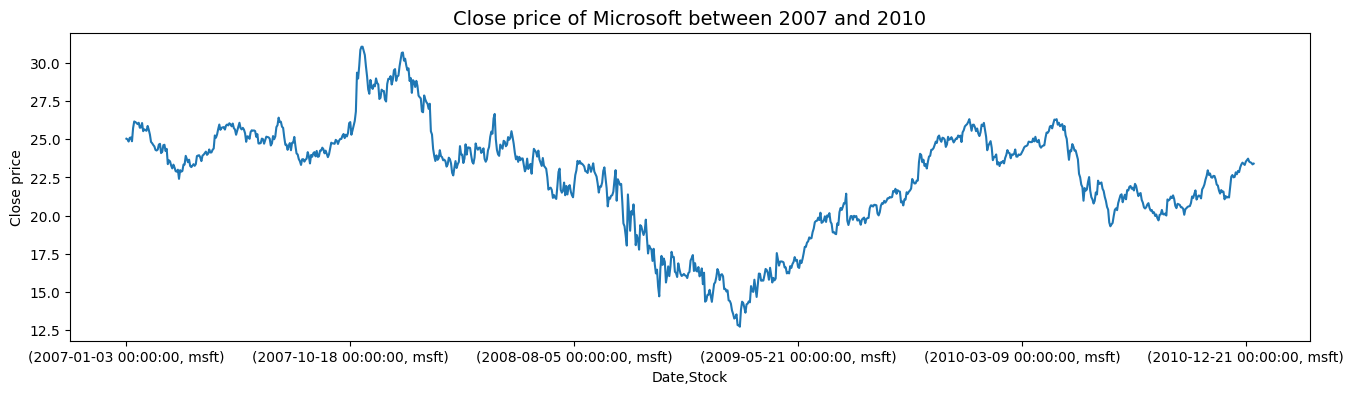

In [41]:
data.loc[idx[:, 'msft'], 'Close'].plot()
plt.ylabel('Close price')
plt.title("Close price of Microsoft between 2007 and 2010", size=14)


Well that's annoying, it didn't make a pretty X axis with the dates, because the index is date, stock.

The reason is slightly annoying: even though we only have msft in the index, it still exists:

In [ ]:
data.loc[idx[:, 'msft'], 'Close'].head(5)

Date        Stock
2007-01-03  msft     25.041
2007-01-04  msft     24.998
2007-01-05  msft     24.856
2007-01-08  msft     25.099
2007-01-09  msft     25.123
Name: Close, dtype: float64

One hacky way to do this would be to say "ok fine, just make the index the dates, and then plot it":

In [ ]:
msft_close = data.loc[idx[:, 'msft'], 'Close']

msft_close.head(2)

Date        Stock
2007-01-03  msft     25.041
2007-01-04  msft     24.998
Name: Close, dtype: float64

Now we can actually change the index by hand, and say we just want that level:

In [ ]:
msft_close.index = msft_close.index.get_level_values('Date')
msft_close.head(2)

Date
2007-01-03    25.041
2007-01-04    24.998
Name: Close, dtype: float64

And now finally do our pretty plot:

<Axes: xlabel='Date'>

Text(0, 0.5, 'Close price')

Text(0.5, 1.0, 'Close price of Microsoft between 2007 and 2010')

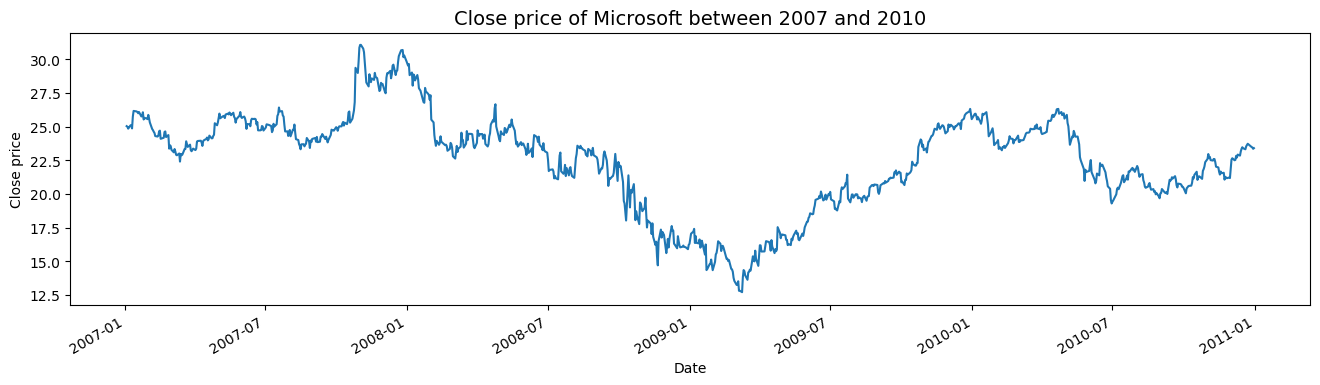

In [ ]:
msft_close.plot()
plt.ylabel('Close price')
plt.title("Close price of Microsoft between 2007 and 2010", size=14)

However there is another way, which is to use cross sections, with [`xs`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html):

In [ ]:
data.xs('msft',                       # <---- msft
        level='Stock',                # <---- which is at index level "Stock"
        drop_level=True).head()       # <---- Get rid of the level, so that the index shows the dates

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,25.073,25.367,24.655,25.041,91732862
2007-01-04,24.898,25.132,24.688,24.998,54581739
2007-01-05,24.832,24.948,24.697,24.856,53189559
2007-01-08,24.864,25.242,24.764,25.099,59801289
2007-01-09,25.141,25.308,24.930,25.123,53215396


And now, plot it!

<Axes: xlabel='Date'>

Text(0, 0.5, 'Close price')

Text(0.5, 1.0, 'Close price of Microsoft between 2007 and 2010')

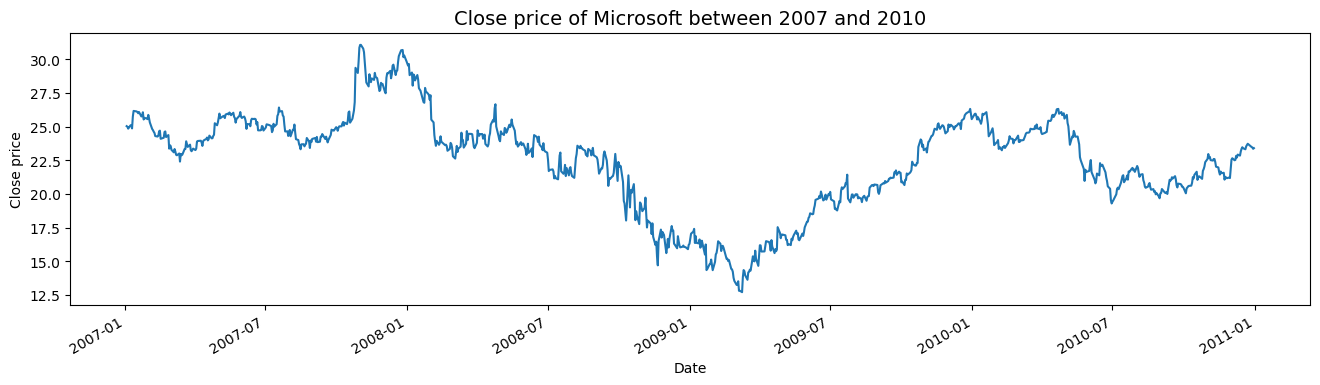

In [ ]:
data.xs('msft', level='Stock', drop_level=True).Close.plot()
plt.ylabel('Close price')
plt.title("Close price of Microsoft between 2007 and 2010", size=14)


As with so much in Pandas, there is more than one way to do things, and you will probably run into `xs(...)` sometimes, `loc[idx[...]]` other times.

A suggestion is to get used to using `loc`, as it is more general and more powerful, but to know that when you get stuck, you can always pick up an alternative (you'll see a lot of `xs` in StackOverflow answers)

## Groupby, and operations

After this detour, let's get back to our main dataset:

In [ ]:
data.head(3)

Open    High     Low   Close   Volume
Date       Stock                                         
2007-01-03 aap    35.139  35.621  34.527  35.011   776642
           abb    13.422  13.429  13.105  13.192  4030670
           achn   16.430  17.280  16.060  17.280    55226

Let's think about the following question. We want to calculate the percentage difference, from day to day.

Can we just sort the data by stock, and then do `.pct_change`?  (spoiler alert: the answer is going to be "No")

In [ ]:
data.sort_index(level=['Stock', 'Date']).Close.pct_change().head()

Date        Stock
2007-01-03  aap           NaN
2007-01-04  aap      0.006455
2007-01-05  aap     -0.022136
2007-01-08  aap      0.003454
2007-01-09  aap      0.008561
Name: Close, dtype: float64

So seems sensible enough...

However, let's inspect a row where we transition from one stock to the other:

In [ ]:
# how long is stock 1?
end_of_first_stock = len(data.loc[idx[:, 'aap'], :])
# show the transition point:
data.sort_index(level=['Stock', 'Date']).Close.pct_change().iloc[end_of_first_stock - 3: end_of_first_stock + 3]

Date        Stock
2010-12-29  aap      0.003022
2010-12-30  aap      0.004068
2010-12-31  aap     -0.008545
2007-01-03  abb     -0.797327
2007-01-04  abb     -0.031762
2007-01-05  abb     -0.018790
Name: Close, dtype: float64

So what did we do on that transition? We subtracted one stock, on one day, to another stock on a different year!

**What's the right way to do this?** _(well, the chapter IS called Groupby...)_

In [ ]:
# group by the stock, and then take the Close, and calculate percentage change
data.groupby(level='Stock').Close.pct_change().head()

Date        Stock
2007-01-03  aap     NaN
            abb     NaN
            achn    NaN
            achv    NaN
            adm     NaN
Name: Close, dtype: float64

Wait what? Oh, right. On the first day, there isn't a previous day to calculate change. Let's take a look at another day:

In [ ]:
# exceptionally I'm using the "lazy" way to do loc here, for the sake of simplicity:

data.groupby(level='Stock').Close.pct_change().loc['May 5th 2008'].head()

Stock
aap    -0.018962
abb     0.004548
achn    0.045946
achv    0.020468
adm     0.003425
Name: Close, dtype: float64

Let's manually check this. What was the price for `abb` on `2008-05-05`?

In [ ]:
data.loc[idx['May 5th 2008', 'abb'], 'Close']

22.97

And on the previous day?

In [ ]:
data.loc[idx['May 4th 2008', 'abb'], 'Close']

KeyError: ('May 4th 2008', 'abb')

Uuuhh... no data on that day! Which makes it particularly cool that Pandas figures out on its own to look on the previous day where there is some data.

In [ ]:
data.loc[idx['May 2th 2008': 'May 5th 2008', 'abb'], 'Close']

Date        Stock
2008-05-02  abb      22.866
2008-05-05  abb      22.970
Name: Close, dtype: float64

What is the percentage change between the two days?

In [ ]:
print('Percentage change between the consecutive days: %0.6f:' % ((22.970 - 22.866) / 22.866))

Percentage change between the consecutive days: 0.004548:


Which is exactly what we got!

# A few other notes on multi-indexing

Multi-indexing, and particularly multi-indexing with time series is a giant world. There are many redundant ways to do things, and it is not our intention to make you learn every single method out there.   

There are way too many redundant ways to do things, and most of the time you can simply hack around obstacles without adding more tools.

The objective here is to give you enough tools to solve 80% of the problems, and know where to look on the other 20%   

We talked about multi-indexing at the row level, but we can also do multi-indexing at column level!  Not done here to avoid unnecessary complexity.

There are a LOT of wrong and obsolete answers out there. Be a bit cynical when reading stackoverflow answers, or old blog posts. Many things are already deprecated, and lots of answers that you will find out there don't actually work.   

You now know the basics of Multi-indexing in time series. That makes you part of a pretty small group of people who have studied this intimidating field. Consider yourself initiated, and sworn to a secret illuminati society.   

References:

- [Somebits](https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html)
- [Pandas multi-index documentation](http://pandas.pydata.org/pandas-docs/stable/advanced.html#multiindex-advanced-indexing)

-----

### **Summary of the methods we have learnt in this Notebook:**
* `loc` - loc allows you to select by doing `dataframe.loc[index, columns]`
* We can use idx = `pd.IndexSlice` so that we don't have to use `slice()` all over the place. This will take slices from the index
* Selecting from multi-index: `dataframe.loc[idx[index_level_0, index_level_1], columns]`
* Groupby different levels: `dataframe.groupby(level=<level_you_want>).mean()` -> Remember you need an aggregation function after groupby.
* Finding the first occurrence of the min or the max: `idxmin()` or `idxmax()`
* Put one of the multi-index level into columns: `unstack()`
* Using cross sections: `xs()`

### **A few examples:**

* An example we have seen: `food.loc[idx['Dingo Poce', :], :]`
* Slicing multi-index: `food.loc[idx['Incontinente', 'Bananas': 'Rice'], 'Quality']`
* groupby Product and get the minimum Price: `food.groupby(level='Product').Price.min()`
* Example of unstack: `data.loc[idx['June 10th, 2008':'June 14th, 2008', ['msft', 'ibm' ,'ebay']],'Close'].unstack()`
* Example of cross sections: `data.xs('msft', level='Stock', drop_level=True)`

-----

### Optional section (groupby with lambda functions)

> Where should i buy each product?

In [ ]:
food.groupby(level='Product').Price.apply(lambda x: list(x.loc[x == x.min()].index))

Product
Apples         [(Dingo Poce, Apples), (Dumbo, Apples)]
Bananas                      [(Incontinente, Bananas)]
Dog food                           [(Dumbo, Dog food)]
Olives                        [(Incontinente, Olives)]
Rice        [(Dingo Poce, Rice), (Incontinente, Rice)]
Name: Price, dtype: object

We might also want to aggregate by more than one method at the time:

In [ ]:
food.groupby(level='Product').agg({'Price':['idxmin', 'min']})

Price     
                           idxmin  min
Product                               
Apples       (Dingo Poce, Apples)  2.0
Bananas   (Incontinente, Bananas)  2.0
Dog food        (Dumbo, Dog food)  1.0
Olives     (Incontinente, Olives)  4.0
Rice           (Dingo Poce, Rice)  1.0

Sometimes the level of complexity leads to [this conclusion](https://youtu.be/syhlPzqEpkE?t=28s)

###  End of optional section